In [21]:
import random

from typing import List, Tuple

# Лабораторная работа 1. Методы сортировки

Вариант: 2

## Сортировка слиянием (merge sort)

### Классификация алгоритма:

- По типу алгоритма: сортировка слияния

- По устойчивости: устойчивый

- По месту хранения данных: не на месте(требует дополнительной памяти для обьединения списков

- По выделению дополнительного пространства: сортировка на месте

- По дополнительным затратам памяти: $O(n)$
   
- Время выполнения: 
  
  - В худшем случае: $O(n log n)$
  
  - В лучшем случае: $O(n log n)$
  
  - В среднем: $O(n log n)$

### Описание алгоритма:

Сортировка слиянием (merge sort) является алгоритмом, основанным на принципе «разделяй и властвуй» (divide and conquer). Алгоритм сначала разделяет исходный массив на две равные части, затем рекурсивно сортирует каждую из них, а затем объединяет их в один отсортированный массив.

Алгоритм состоит из следующих шагов:

Если длина массива меньше или равна 1, то он уже отсортирован, и возвращается сам массив.

Если длина массива больше 1, то он разбивается на две равные части.

Каждая из двух частей рекурсивно сортируется с помощью сортировки слиянием.

Результаты сортировки каждой из двух частей объединяются в один отсортированный массив. Для этого происходит слияние двух отсортированных массивов путем сравнения элементов в них и добавления их в выходной массив в порядке возрастания.

Отсортированный массив возвращается.

### Блок-схема алгоритма
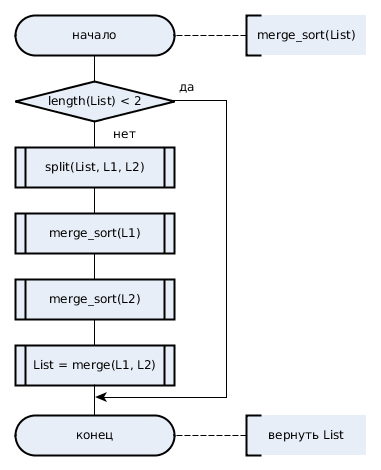

### Псевдокод алгоритма

```
function merge_sort(array)
    if length(array) ≤ 1
        return array

    middle = length(array) / 2
    left = array[0:middle]
    right = array[middle:]

    return merge(merge_sort(left), merge_sort(right))

function merge(left, right)
    result = []
    while length(left) > 0 and length(right) > 0
        if left[0] <= right[0]
            result.append(left[0])
            left = left[1:]
        else
            result.append(right[0])
            right = right[1:]

    if length(left) > 0
        result.extend(left)
    else
        result.extend(right)

    return result

```


# Достоинства и недостатки
Достоинства алгоритма:
    
  
    -- Устойчивость: порядок равных элементов в исходном массиве сохраняется.
    -- Гарантированный результат: время выполнения всегда O(n log n), независимо от исходного состояния массива.
    -- Эффективность для больших массивов: в отличие от некоторых других сортировок, время выполнения сортировки слиянием не увеличивается сильно при увеличении размера массива.
    -- Независимость от расположения элементов в массиве: сортировка слиянием не зависит от того, как элементы расположены в массиве.
    
Недостатки:

    -- Дополнительное пространство: сортировка слиянием требует дополнительной памяти для хранения временных массивов, что может быть проблемой для больших массивов.
    -- Худшее время выполнения: худшее время выполнения сортировки слиянием составляет O(n^2), что может быть неприемлемо для некоторых приложений.
    -- Неэффективность для маленьких массивов: при малых размерах массива сортировка слиянием может оказаться неэффективной по сравнению с другими алгоритмами, такими как сортировка вставками или сортировка выбором.

### Реализация алгоритма и тесты

In [1]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_arr = arr[:mid]
    right_arr = arr[mid:]

    left_arr = merge_sort(left_arr)
    right_arr = merge_sort(right_arr)

    return merge(left_arr, right_arr)


def merge(left_arr, right_arr):
    res = []
    left_idx = right_idx = 0

    while left_idx < len(left_arr) and right_idx < len(right_arr):
        if left_arr[left_idx] < right_arr[right_idx]:
            res.append(left_arr[left_idx])
            left_idx += 1
        else:
            res.append(right_arr[right_idx])
            right_idx += 1

    if left_idx < len(left_arr):
        res.extend(left_arr[left_idx:])

    if right_idx < len(right_arr):
        res.extend(right_arr[right_idx:])

    return res


In [2]:
assert merge_sort([]) == []
assert merge_sort([2]) == [2]
assert merge_sort([3, 5, 2, 7]) == [2, 3, 5, 7]
assert merge_sort([-1, 0, 9, -10, 3, -2]) == [-10, -2, -1, 0 ,3, 9]

### Ручная трассировка

пусть будет массив рандомный: [38, 27, 43, 3, 9, 82, 10]

первый вызов merge_sort на массив изначальный [38, 27, 43, 3, 9, 82, 10] -> Разделение массива на две половины [38, 27, 43, 3] и [9, 82, 10]

вызов merge_sort([38, 27, 43, 3]) -> Разделение массива на две половины [38, 27] и [43, 3]

........

Последнее объединение отсортированных половин [3, 27, 38, 43] и [9, 10, 82] в [3, 9, 10, 27, 38, 43, 82]
И получаем отсортированный массив: [3, 9, 10, 27, 38, 43, 82]

In [3]:
from typing import List

def merge_sort(X: List) -> List:
    '''Сортировка списка X методом слияния'''
    if len(X) <= 1:
        return X
    else:
        middle = len(X) // 2
        left = X[:middle]
        right = X[middle:]
        print("left:", left, "right:", right) # Выводим процесс деления на две части
        left = merge_sort(left)
        right = merge_sort(right)
        return merge(left, right)

def merge(left: List, right: List) -> List:
    '''Слияние двух списков'''
    result = []
    i, j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]
    result += right[j:]
    print("merge:", result) # Выводим процесс слияния
    return result


    
A = [5, 8, 12, 7, 6]
print("Before sorting:", A)
A = merge_sort(A)
print("After sorting:", A)

Before sorting: [5, 8, 12, 7, 6]
left: [5, 8] right: [12, 7, 6]
left: [5] right: [8]
merge: [5, 8]
left: [12] right: [7, 6]
left: [7] right: [6]
merge: [6, 7]
merge: [6, 7, 12]
merge: [5, 6, 7, 8, 12]
After sorting: [5, 6, 7, 8, 12]


### Сравнение

In [4]:
# Набор данных для тестирования алгоритма

def get_sort_array(n:int)->Tuple:
    '''Возвращает отсортированный массив'''
    return tuple(range(n))

def get_reverse_array(n:int)->Tuple:
    '''Возвращает отсортированный в обратном порядке массив'''
    return tuple(range(n))[::-1]

def get_random_array(n:int)->Tuple:
    '''Возвращает перемешанный массив'''
    return tuple(random.sample(range(n), n))


NameError: name 'Tuple' is not defined

In [ ]:
import time
n1 = 1000
n2 = 5000
n3 = 10000
n4 = 100000



def compare_merge_sort(array_size):
    array1 = get_sort_array(array_size)
    array2 = get_reverse_array(array_size)
    array3 = get_random_array(array_size)

    start_time1 = time.time()
    merge_sort(array1)
    end_time1 = time.time()
    
    start_time2 = time.time()
    merge_sort(array2)
    end_time2 = time.time()
    
    start_time3 = time.time()
    merge_sort(array3)
    end_time3 = time.time()
    print(f"Размер sort массива: {array_size}, время выполнения: {end_time1 - start_time1:.5f} секунд.")
    print(f"Размер reverse массива: {array_size}, время выполнения: {end_time2 - start_time2:.5f} секунд.")
    print(f"Размер random массива: {array_size}, время выполнения: {end_time3 - start_time3:.5f} секунд.")
    print("----------")
    
for array_size in [n1, n2, n3, n4]:
    compare_merge_sort(array_size)



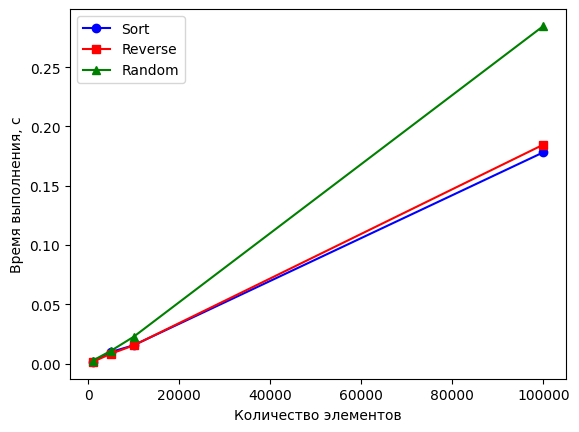

In [5]:
import matplotlib.pyplot as plt

sizes = [1000, 5000, 10000, 100000]
sort_times = [0.00156, 0.00983, 0.01553, 0.17824] 
reverse_times = [0.00150, 0.00834, 0.01541, 0.18471]
random_times = [0.00253, 0.01080, 0.02266, 0.28473]

# построение графика
plt.plot(sizes, sort_times, color='blue', marker='o', linestyle='-', label='Sort')
plt.plot(sizes, reverse_times, color='red', marker='s', linestyle='-', label='Reverse')
plt.plot(sizes, random_times, color='green', marker='^', linestyle='-', label='Random')

plt.xlabel('Количество элементов')
plt.ylabel('Время выполнения, с')
plt.legend()
plt.show()

### Литература

Роберт Седжвик. Фундаментальные алгоритмы на C. Анализ/Структуры данных/Сортировка/Поиск = Algorithms in C. Fundamentals/Data Structures/Sorting/Searching. — СПб.: ДиаСофтЮП, 2003. — С. 672. — ISBN 5-93772-081-4.

https://ru.overleaf.com/learn/latex/LaTeX_Graphics_using_TikZ%3A_A_Tutorial_for_Beginners_(Part_3)%E2%80%94Creating_Flowcharts

https://www.ctan.org/pkg/nassflow





8. Провести сравнение указанных алгоритмов сортировки массивов, содержащих n1, n2, n3 и n4 элементов. 
9. Каждую функцию сортировки вызывать трижды: для сортировки упорядоченного массива, массива, упорядоченного в обратном порядке и неупорядоченного массива. Сортируемая последовательность для всех методов должна быть одинаковой (сортировать копии одного массива). 
10. Проиллюстрировать эффективность алгоритмов сортировок по заданному критерию. Построить диаграммы указанных зависимостей.